## Hexagon Bin Plotter

We call the libraries and the data from the experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [2]:
mydata = np.genfromtxt("out_watts",delimiter="\t")

In [3]:
density = [i[5] for i in mydata]
clustc = [i[6] for i in mydata]
S_R_ratio = [i[1]/(i[0]+i[1]) for i in mydata]
Res = [i[1] for i in mydata]
Suc = [i[0] for i in mydata]
S_R_winratio = [i[3]/(i[2]+i[3]) for i in mydata]
Res_win = [i[3] for i in mydata]
Suc_win = [i[2] for i in mydata]

We generate the function for plotting many comparisons

In [4]:
def plot_comparison(x,y,xlab,ylab,title1,title2):
    
    x = np.array(x)
    y = np.array(y)
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()

    fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
    fig.subplots_adjust(wspace=1, left=0, right=1)
    ax = axs[0]
    hb = ax.hexbin(x, y, gridsize=40, cmap='inferno')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_title(title1)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('counts')

    ax = axs[1]
    hb = ax.hexbin(x, y, gridsize=40, bins='log', cmap='inferno')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_title(title2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log10(counts)')
    
    plt.savefig("Figures/"+title1, bbox_inches='tight')
    plt.show()

### Density vs S/R Ratio

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.326530612245, right=0.326530612245
  'left=%s, right=%s') % (left, right))


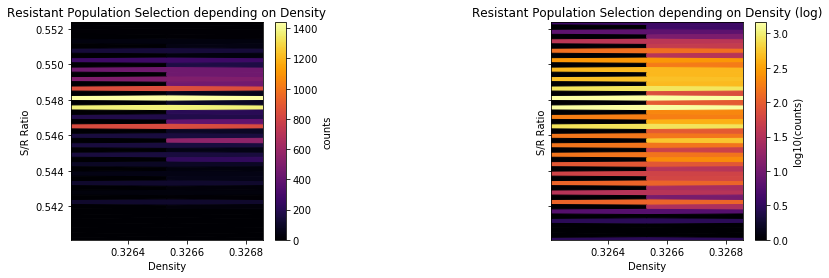

In [5]:
plot_comparison(density,S_R_ratio,"Density","S/R Ratio","Resistant Population Selection depending on Density","Resistant Population Selection depending on Density (log)")

### Clustering Coefficent vs S/R Ratio

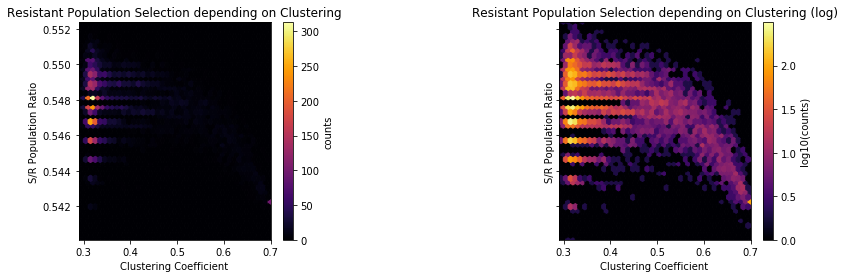

In [6]:
plot_comparison(clustc,S_R_ratio,"Clustering Coefficient","S/R Population Ratio","Resistant Population Selection depending on Clustering","Resistant Population Selection depending on Clustering (log)")

### Relationship between Node Winners and S/R Ratio

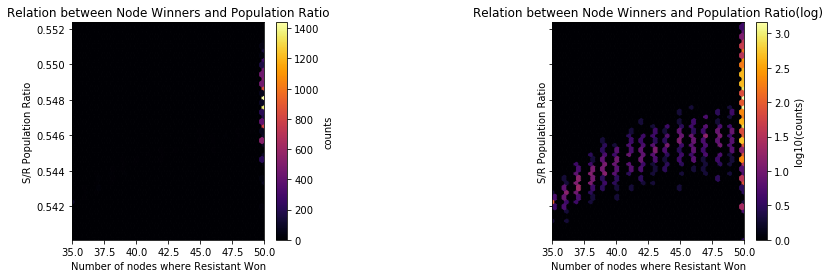

In [7]:
plot_comparison(Res_win,S_R_ratio,"Number of nodes where Resistant Won","S/R Population Ratio","Relation between Node Winners and Population Ratio","Relation between Node Winners and Population Ratio(log)")